In [2]:
# Lab 1A by Lennart Beekhuis and Bram Otten
# 09-02-2018

## Exercise 1



This exercise is meant to help you get familiar with some language data, do some basic text-processing, and explore some concepts learnt in class. We will use two kinds of corpora in this exercise, the **Penn Treebank** corpus (newspaper text) and the **CHILDES** corpus (child language learning data), described below. For each of them,  take a few minutes to read the sentences/utterances before starting to program. Then, using Jupyter Notebook, write code to answer the given questions. We have included a number of additional (optional) questions at the end of in **Going Further**. If you finish the main questions, choose one of the additional ones to work on. **Total points: 10**





In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import string
import re
import glob
import nltk
from nltk.corpus import treebank

### Penn Treebank Corpus

The **Penn Treebank** is a collection of data from the newspaper _The Wall Street Journal_, of about 1 Million words (40K sentences).  This dataset is very commonly used to to train models in NLP systems. It also contains additional information like Part-of-Speech tags and syntactic trees, which has been removed for this exercise. (In later exercise we will use some of this information.) The dataset contains one sentence per line for this exercise.

(a) What are the total number of word tokens in this corpus? In this case, consider a word to be any string that is separated by whitespace. What are the total number of distinct word _types_?

In [4]:
file = open('./sec02-21.raw', 'r')

words_a = []
stringCount = 0
for line in file:
    stringCount += 1
    for word in line.split():
        words_a.append(word)
        
def printer(words):
    print("Total number of words:        ", len(words))
    print("Number of distinct word types:", len(set(words)))
    
printer(words_a)

Total number of words:         929552
Number of distinct word types: 44210


(b) In some cases, we don't want to consider punctuations the same way as other word tokens. Using regular expressions, remove punctuations from the corpus, and count the number of word tokens now.  What is the number of distinct word types?

In [5]:
# Only count strings where the first character
# is a letter or a number.

words_b = []
for word in words_a:
    
    append = False
    firstCharacter = word[0]
    
    if firstCharacter.isalpha():
        append = True
    elif firstCharacter.isnumeric():
        append = True
    
    if append is True:
        words_b.append(word)
        
printer(words_b)

Total number of words:         810631
Number of distinct word types: 44162


(c) In some cases, it might be useful to remove the distinction between upper-cased and lower-case words, for example, the two uses of _can_ in _Can you program in Python?_ and _I can program in Python_. Again using regular expressions, convert all words to lower-case, and now count the number of distinct word types in the corpus. 

In [6]:
# Regex is not needed as Python
# has a function which handles this

words_c = []
for word in words_b:
    words_c.append(word.lower())

printer(words_c)

Total number of words:         810631
Number of distinct word types: 39338


(d) Plot a graph of word frequency versus rank of a word in this corpus (after removing punctuation and lower-casing). Does this corpus obey Zipf's law?

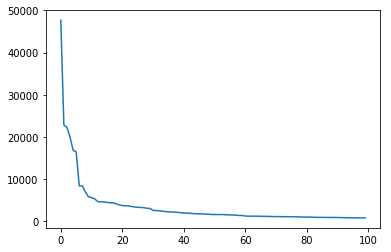

And with ln(y), it 'should' be a straight line:


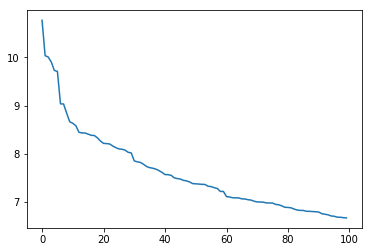

The corpus doesn't obey Zipf's law perfectly
but probably comes about as close as can be
expected from real sentences processed this way.


In [7]:
# Count the frequency of each word.
# Afterwards, sort them on count and plot.

from collections import Counter

cnt = Counter()
for word in words_c:
    cnt[word] += 1

y_axis = sorted(list(cnt.values()), reverse=True)
x_axis = np.linspace(0, len(cnt), len(y_axis))
n = 100

plt.show(plt.plot(x_axis[:n], y_axis[:n]))

print("And with ln(y), it 'should' be a straight line:")
plt.show(plt.plot(x_axis[:n], np.log(y_axis[:n])))

print("The corpus doesn't obey Zipf's law perfectly")
print("but probably comes about as close as can be")
print("expected from real sentences processed this way.")

(e) While processing the corpus as above, there may still be a few things that you don't consider real words. What are some of those things? [The question of what counts as a word and what doesn’t comes up a lot in NLP, and there is rarely a single correct answer; often we need to use our judgment and justify our decisions.]. Go back and remove some of these non-words, and re-plot the graph. 

In [8]:
print(list(set(words_c[42:92])))

print(), print("Let's remove numbers as well.")

words_e = []
for word in words_c:
    if word[0].isnumeric():
        continue
        
    words_e.append(word)
    
    
print(), print(list(set(words_e[42:92]))), print()
printer(words_e)

['year', '1,200', 'president', 'steady', 'mosher', '1,214', 'inc.', 'remain', 'its', 'at', 'in', 'the', 'last', 'said', 'officer', 'sales', '1990', 'about', 'cars', 'chief', 'executive', 'to', 'it', 'britain', 'for', 'auto', 'luxury', 'u.s.', 'expects', 'growth', 'sold', 'anticipates', 'maker', 'howard', 'and', 'europe', 'he']

Let's remove numbers as well.

['year', 'president', 'steady', 'mosher', 'inc.', 'remain', 'its', 'at', 'in', 'the', 'last', 'said', 'officer', 'sales', 'chief', 'about', 'cars', 'far', 'markets', 'executive', 'to', 'it', 'britain', 'for', 'auto', 'luxury', 'u.s.', 'expects', 'growth', 'sold', 'anticipates', 'maker', 'howard', 'and', 'europe', 'he', 'eastern']

Total number of words:         784215
Number of distinct word types: 34149


(f) Assume that the probability $P(w_1^n)$ of a sentence $w_1 \ldots w_n$   can be calculated as follows:

$$P(w_1^n) = P(w_1) . P(w_2) \ldots P(w_n) $$

The probability of a word $w_i$ can be calculated from a corpus as $P(w_i) = count (w_i) / N$ where $N$ is the total number of word tokens in the corpus. 

What is the probability of the first two sentences in the corpus? 

In [9]:
n = len(words_e)
sentences = [words_e[:35], words_e[35:39]]
probabilities = []
for sent in sentences:
    p = 1
    for word in sent:
        p *= cnt[word] / n
    probabilities.append(p)
    
print("Probability of sentence 1:", probabilities[0])
print("Probability of sentence 2:", probabilities[1])

Probability of sentence 1: 1.493975052085559e-130
Probability of sentence 2: 4.702067613756634e-20


(g) What is the average _sentence length_ of sentences in the Penn Treebank?

In [10]:
print("Average sentence length:", n / stringCount)

Average sentence length: 19.801408948591053


## CHILDES corpus
The second corpus contains data from CHILDES, the Child Language Data Exchange System. CHILDES is a large repository containing many different corpora in many different languages, all contributed by researchers interested in child language development. Since the particular interests of the different researchers vary consider- ably, the different corpora contain different types of data (transcriptions, audio, and/or video) and different kinds of annotations (ranging from detailed phonetic transcripts to morphological and syntactic annotations). However all the corpora are annotated using similar guidelines, so that tools can be developed to work with the annotations across different corpora.

We will use the Providence corpus for this lab. To download the corpus, click on the following URL or paste it into your web browser: http://homepages.inf.ed.ac.uk/sgwater/teaching/Providence.zip

(a) This corpus is contains very different data from the Penn Treebank. To get an idea of what is in the files, take a look at _eth01.cha_ by opening it in a text editor or using a unix command like _less_. What information is in the metadata at the top of each file? _(Hint: child language researchers use the format y;m.d to indicate a child's age in years;months.days)_

What do you see in the rest of the file? _Hint: the string of numbers at the end of each line is a code that links to a time point in the audio recording of this data. The audio isn't included here but can be obtained from the CHILDES database.)_

In [11]:
print("""
The metadata contains encoding, language,  who's part of 
a conversation (including informing us how old and which
role the persons have, what their native languages are),
and the type of media this transcript originates from.

The file contains lines for each sentence someone speaks,
preceded by the speaker and followed by a timestamp.
Other lines are commentary etc. without specific timestamps.
""")


The metadata contains encoding, language,  who's part of 
a conversation (including informing us how old and which
role the persons have, what their native languages are),
and the type of media this transcript originates from.

The file contains lines for each sentence someone speaks,
preceded by the speaker and followed by a timestamp.
Other lines are commentary etc. without specific timestamps.



## Header

@UTF8

@Begin

@Languages:	eng

@Participants:	CHI Ethan Target_Child, MOT Mother Mother

@ID:	eng|Ethan|CHI|0;11.4|male|||Target_Child|||

@ID:	eng|Ethan|MOT|25;||||Mother|||

@Birth of CHI:	12-DEC-2000

@Birth of MOT:	16-NOV-1976

@Media:	eth01, audio

@Comment:	manuela barcelos

@Comment:	Language of Caregivers is Mother Standard American English (Midwest , Chicago)

Father Standard American English (originally from Brooklyn but speaks SAE)

@Date:	16-NOV-2001

*MOT:	you wanna sit with mommy ? 34413_37325

(b)  Actually, the _eth01.cha_ file is maybe not one of the more interesting ones. Take a look now at _eth50.cha_.
What are some of the main differences you see between the data in these two files? Is there an obvious explanation for those differences? 



In [12]:
print("""
The child makes noise now, lines after these utterances 
contain phonetic and mod(?) information. The obvious 
explanation is that in the course of these 50 sessions the
child has started to learn speaking.
""")


The child makes noise now, lines after these utterances 
contain phonetic and mod(?) information. The obvious 
explanation is that in the course of these 50 sessions the
child has started to learn speaking.



## Header

@UTF8

@Begin

@Languages:	eng

@Participants:	CHI Ethan Target_Child, MOT Mother Mother, TOY Toy Toy

@ID:	eng|Ethan|CHI|1;1.5|male|||Target_Child|||

@ID:	eng|Ethan|MOT|26;||||Mother|||

@ID:	eng|Ethan|TOY|26;||||Toy|||

@Birth of CHI:	12-DEC-2000

@Birth of MOT:	17-JAN-1976

@Birth of TOY:	17-JAN-1976

@Media:	eth05, audio

@Comment:	patrick tonks

@Comment:	Language of Caregivers is Mother Standard American English (Midwest , Chicago) 

Father Standard American English (originally from Brooklyn but speaks SAE)

@Comment:	difference between /ɑ/ , /æ/ and /d/ , /t/ is often not clear

@Date:	17-JAN-2002


## Child talks more, because older

(c) Mean length of utterance (MLU) is a measure of child language development which refers to the average number of words (or, sometimes, morphemes) in each of the child’s utterances (spoken sentences). What is Ethan’s MLU in the file _eth50.cha_? Assume for this question that a word is any whitespace-delimited string of characters (including punctuation) in the transcription. So, for example, you should count _fill him with pom+poms xxx ._ as six words. (You will need some regular expression based text-processing here)

In [13]:
import io
file = io.open("./Providence/Ethan/eth50.cha", 
            mode="r", encoding="utf-8")

count = 0
utterances = 0
for line in file:
    if re.match("\*CHI:	*", line):
        count += 1
        line = line.split('')[0]
        line = line.split(':	')[1]
        utterances += len(line.split())
print("MLU =", utterances / count)

MLU = 4.656429942418426


(d) Make a plot of Ethan's MLU from _eth01_ to _eth50_

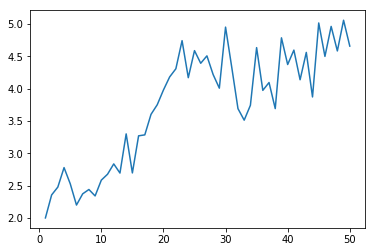

In [14]:
def plotter(to_match):
    xList = [i for i in range(1,51)]
    yList = []
    for i in xList:
        count = 0 
        utterances = 0
        if i < 10:
            i = "0" + str(i)
        path = "./Providence/Ethan/eth{}.cha".format(i)
        for line in io.open(path, mode="r", encoding="utf-8"):
            if re.match(to_match, line):
                count += 1
                line = line.split('')[0]
                line = line.split(':	')[1]
                utterances += len(line.split())
        yList.append(utterances / count)
    plt.show(plt.plot(xList, yList))
    
plotter("\*CHI:	*")

## Going further
Have a go at some or all of the following.  These tasks are less challenging from a programming perspective but are still good for getting you to think about the data some more. Task 4 may require a bit more programming but should also be accessible.

(e) Compute type/token ratios for the mothers and children in the corpus. Do you see any consistent patterns?

In [15]:
xList = [i for i in range(1,51)]
motherList = []
childList = []
for i in xList:
    count = 0
    utterances = 0
    if i < 10:
        i = "0" + str(i)
    path = "./Providence/Ethan/eth{}.cha".format(i)
    
    for line in io.open(path, mode="r", encoding="utf-8"):
        if re.match("\*CHI:	*", line):
            count += 1
            line = line.split('')[0]
            line = line.split(':	')[1]
            childList.append(line)
        if re.match("\*MOT:	*", line):
            count += 1
            line = line.split('')[0]
            line = line.split(':	')[1]
            motherList.append(line)

            
print("Ethan: ", len(childList) / len(set(childList)))
print("Mother:", len(motherList) / len(set(motherList)))
print("""
So Ethan repeats himself more often. Probably not though,
it's just that everything he says is transcribed as 'xxx'
or something like that. For more accuracy phonemes need
to be taken into account.
""")

Ethan:  2.0568640330299335
Mother: 1.2881108432098347

So Ethan repeats himself more often. Probably not though,
it's just that everything he says is transcribed as 'xxx'
or something like that. For more accuracy phonemes need
to be taken into account.



(f) Compute the MLU for MOT instead of CHI. Plot the MLU of MOT and CHI from the same set of files in a single plot. Do you see the same trends in the MOT and CHI data? Discuss with each other why or why not.

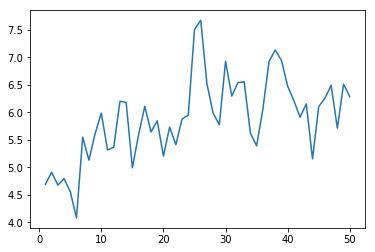


The trend is the same but doesn't look very significant.

An explanation for the upward trend would be that the 
mother will start speaking more complex sentences because
the child appears to understand more. 

An explanation for there being no trend would be that the
mother already knows how to speak, her speech patterns
will not change much anymore.



In [16]:
plotter("\*MOT:	*")

print("""
The trend is the same but doesn't look very significant.

An explanation for the upward trend would be that the 
mother will start speaking more complex sentences because
the child appears to understand more. 

An explanation for there being no trend would be that the
mother already knows how to speak, her speech patterns
will not change much anymore.
""")

(g) Further improve the tokenization so that the word counts you are collecting more accurately reflect "real" words.

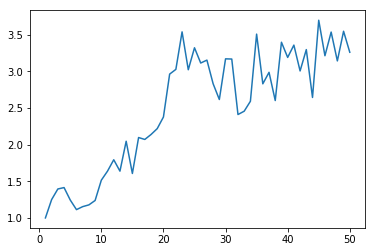

In [17]:
# Deletes certain strings that are used for 
# describing uncertainities in
# the transscription, describing actions, and 
# stressing a part of a sentence

def line_length(line):
    length = len(line.split()) - 1 # for final punctuation.
    for i in range(len(line)):
        curChar = line[i]
        if curChar == '[':
            nextChar = line[i + 1]
            if nextChar == '?' or nextChar == '=' \
                               or nextChar == '!':
                length -= 1
        if curChar == ',':                
            length -= 1
    return length

xList = [i for i in range(1,51)]
yList = []
for i in xList:
    count = 0
    utterances = 0
    if i < 10:
        i = "0" + str(i)
    path = "./Providence/Ethan/eth{}.cha".format(i)
    for line in io.open(path, mode="r", encoding="utf-8"):
        if re.match("\*CHI:	*", line):
            count += 1
            line = line.split('')[0]
            line = line.split(':	')[1]
            utterances += line_length(line)
    yList.append(utterances / count)
    
    
plt.show(plt.plot(xList, yList))